In [1]:
import wrangle_zillow

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

Pulling in all data for explore

In [9]:
df = wrangle_zillow.get_zillow()

In [10]:
df = wrangle_zillow.clean_zillow(df)

In [11]:
columns_to_scale = df.select_dtypes('number').columns.drop(['latitude', 'longitude','regionidzip'])

In [12]:
train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_zillow.prepare_all_data(df, columns_to_scale)

Validating data is the split appropriately and the same

In [13]:
train.shape, validate.shape, test.shape

((25412, 20), (10892, 20), (9077, 20))

In [14]:
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((25412, 20), (10892, 20), (9077, 20))

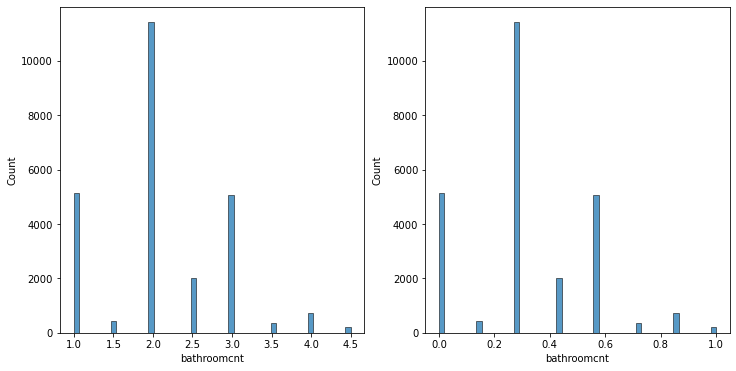

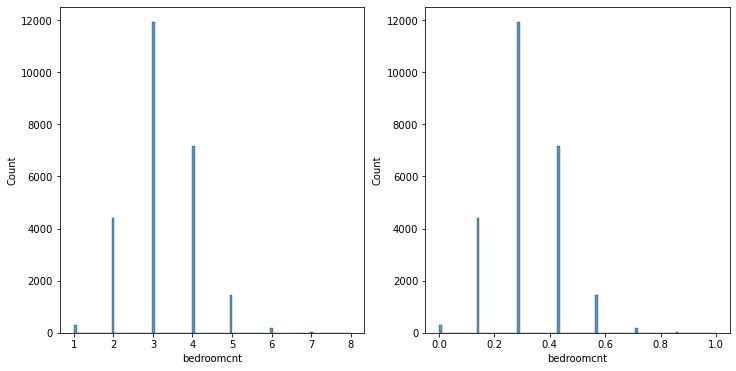

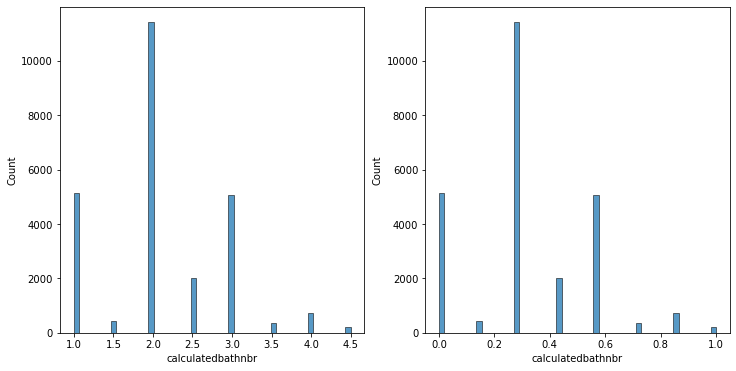

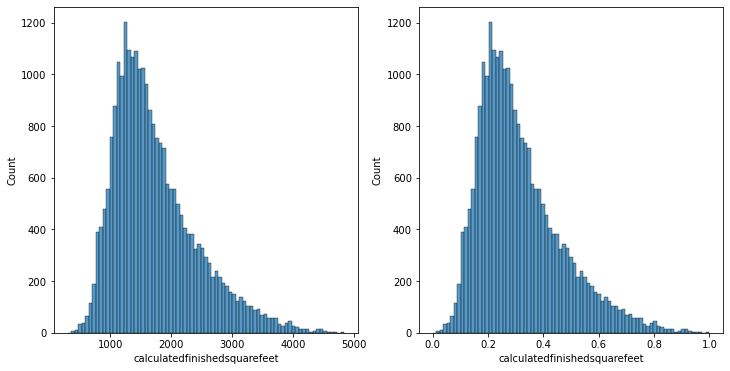

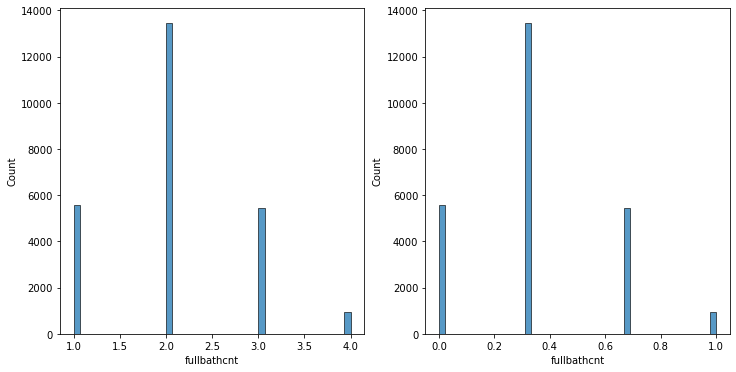

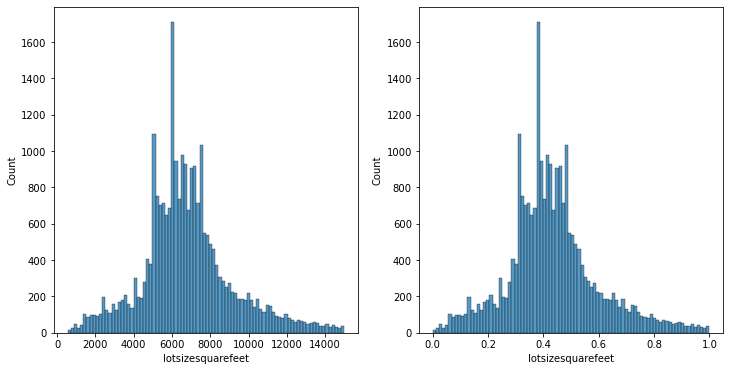

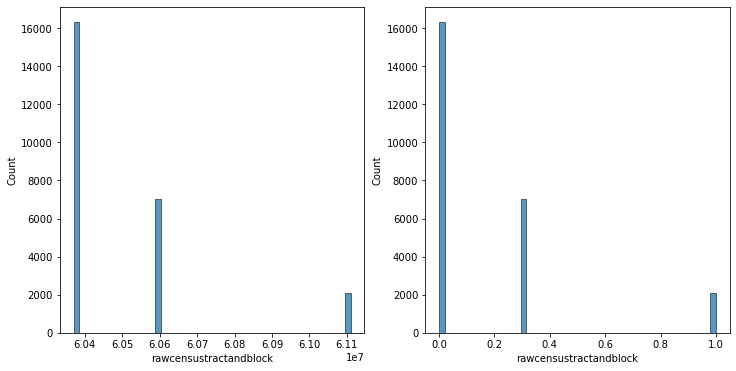

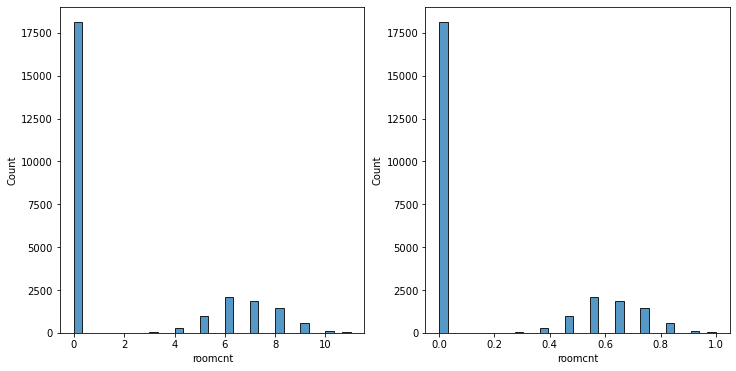

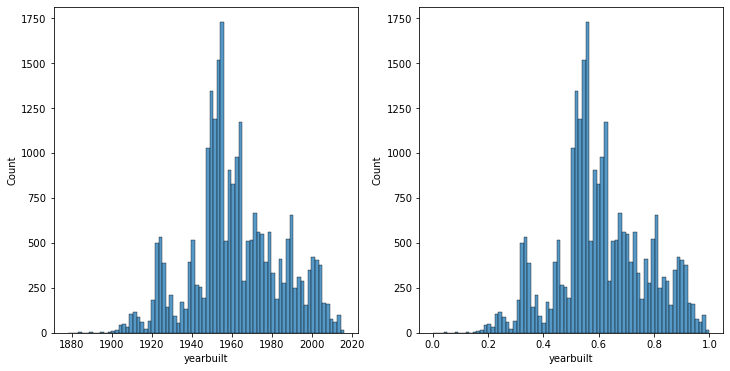

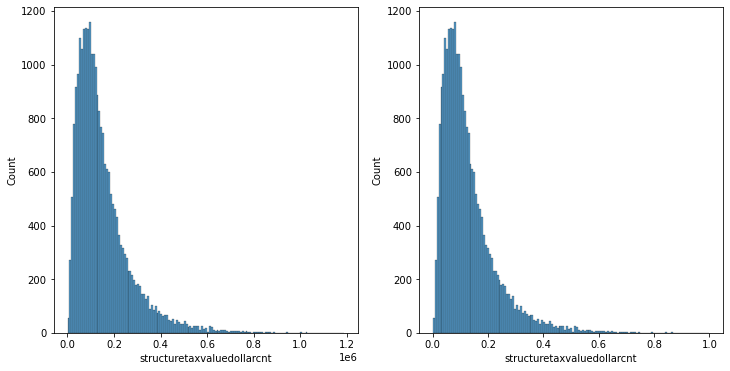

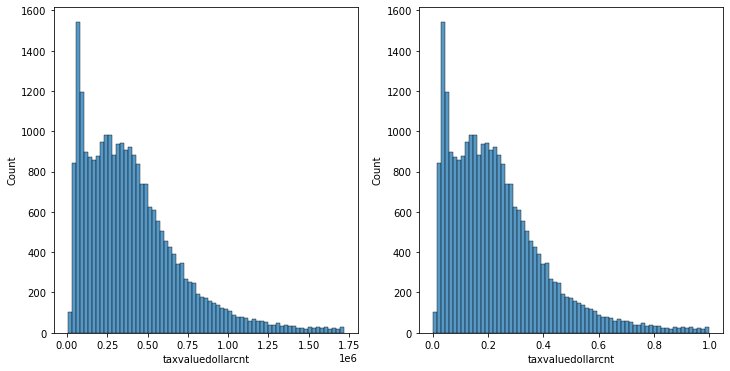

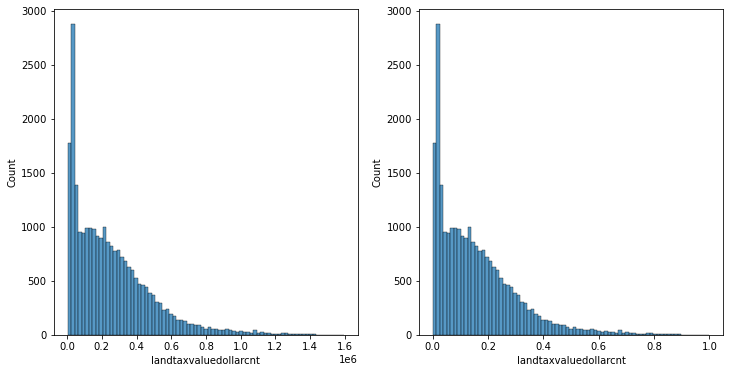

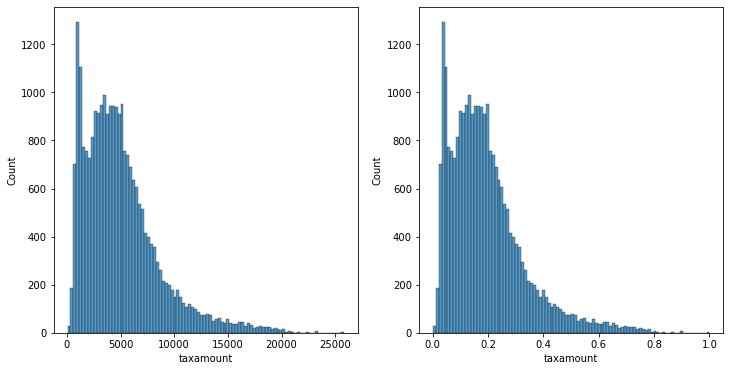

In [15]:
for column in columns_to_scale:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(train[column])
    plt.subplot(122)
    sns.histplot(train_scaled[column])
    plt.show()

Data is split and scaled appropriately, I can begin EDA.

# Exploration

My thoughts from before the data analysis.

- I know some of these values are going to be highly correlated to one another, eg. bathroomcnt and calculatedbathroomnbr and fullbathcnt.
- I suspect that larger homes, larger properties and higher taxvaluedollarcnt will be most correlated to the target logerror.
- I'm curious to see if location by lat and long have any effect on home prices or log error.
- There are categorical columns that are encoded as numerical here, as well as discrete numerical columns; I'm curious to see how there might be a relationship in any of these.

Beginning with bivariate visualizations of all continuous variables

In [16]:
# Writing a function that plots pairs of continuous variables to visualize all the potential relationships.
from itertools import combinations

def plot_variable_pairs(df, to_drop = None):
    '''
    This function takes in a dataframe and plots all possible numerical data pairs in scatterplots with a regression 
    line. The function only plots unique combinations of pairs, not permutations, e.g. only prints column a by 
    column b, but leaves out column b by column a. This reduces clutter and runtime.
    
    arguments: df - A dataframe with numerical columns
               to_drop - a list of columns to drop or not include in the plots
    returns: This function returns nothing; it merely plots out the scatterplots
    '''
    
    if to_drop == None:
        columns_to_plot = df.select_dtypes(include = 'number').columns
        plot_tuples = []
        for i in combinations(columns_to_plot,2):
            plot_tuples.append(i)

        for i in plot_tuples:
            sns.lmplot(x = i[0], y = i[1], data = df, line_kws={'color': '#FF5E13', 'linewidth': 3},  height=5, aspect=1.5)
            plt.plot()
            plt.show()
    else:
        columns_to_plot = df.select_dtypes(include = 'number').columns.drop(to_drop)
        plot_tuples = []
        for i in combinations(columns_to_plot,2):
            plot_tuples.append(i)

        for i in plot_tuples:
            sns.lmplot(x = i[0], y = i[1], data = df, line_kws={'color': '#FF5E13', 'linewidth': 3},  height=5, aspect=1.5)
            plt.plot()
            plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25412 entries, 43958 to 26860
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   25412 non-null  float16
 1   bedroomcnt                    25412 non-null  uint8  
 2   calculatedbathnbr             25412 non-null  float16
 3   calculatedfinishedsquarefeet  25412 non-null  uint16 
 4   county                        25412 non-null  object 
 5   fullbathcnt                   25412 non-null  float64
 6   latitude                      25412 non-null  float64
 7   longitude                     25412 non-null  float64
 8   lotsizesquarefeet             25412 non-null  float64
 9   propertycountylandusecode     25412 non-null  object 
 10  rawcensustractandblock        25412 non-null  float64
 11  regionidzip                   25412 non-null  float64
 12  roomcnt                       25412 non-null  uint8  
 1

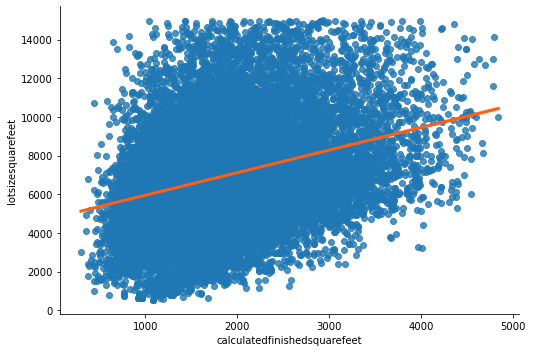

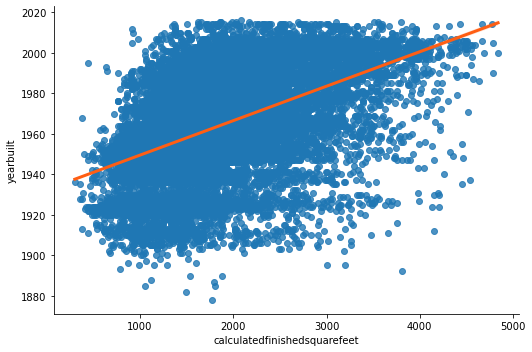

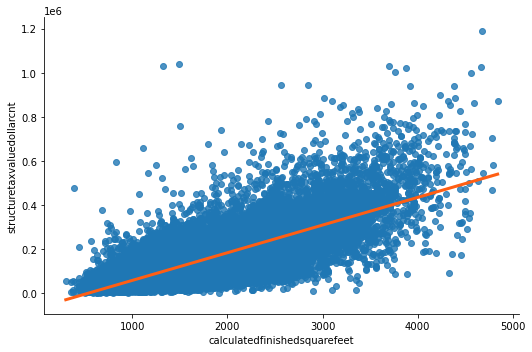

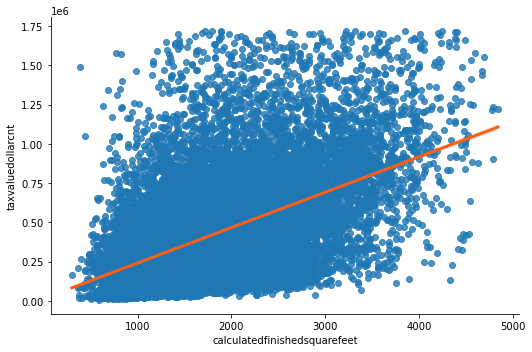

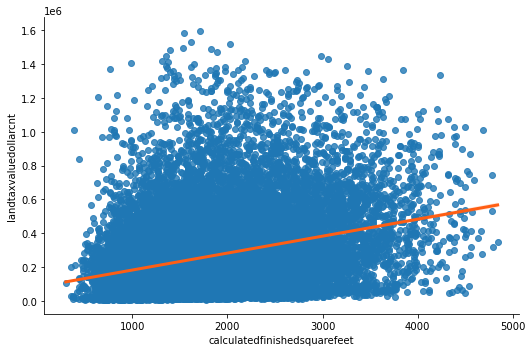

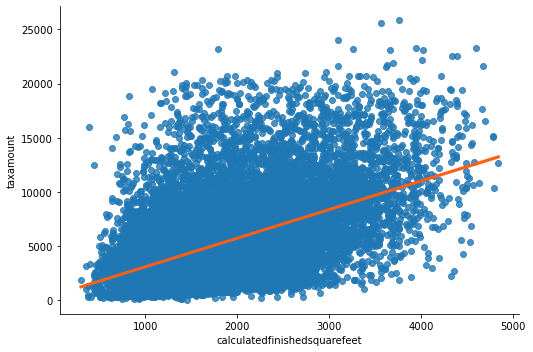

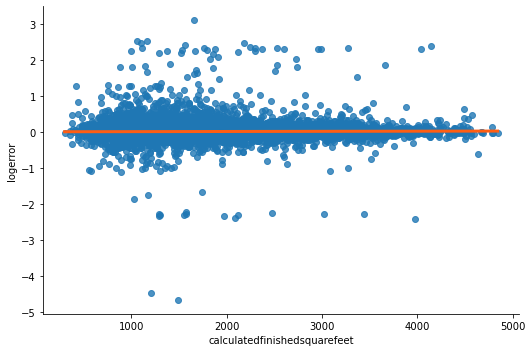

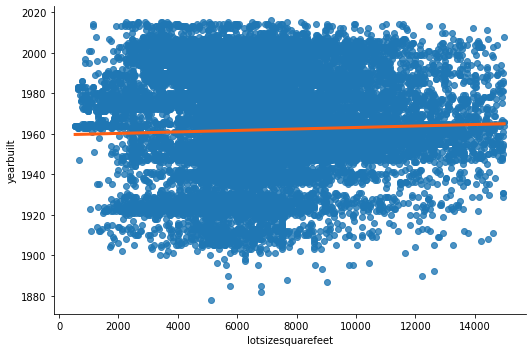

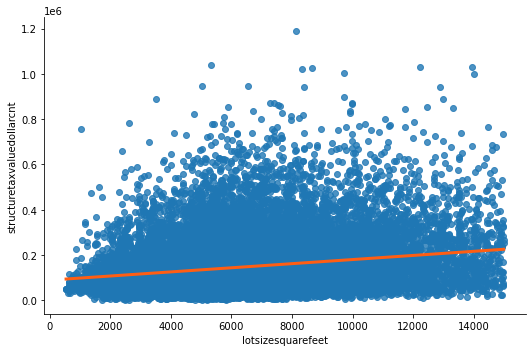

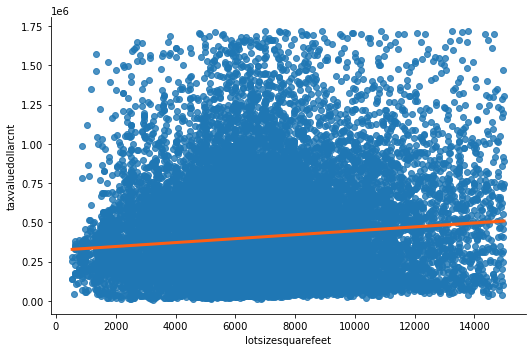

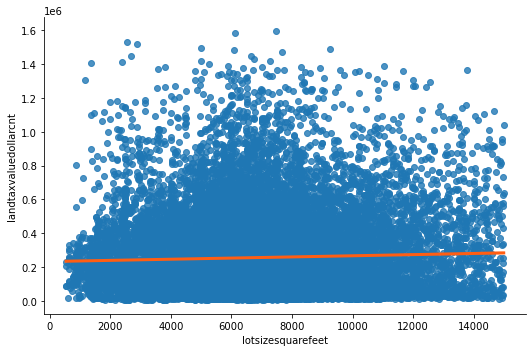

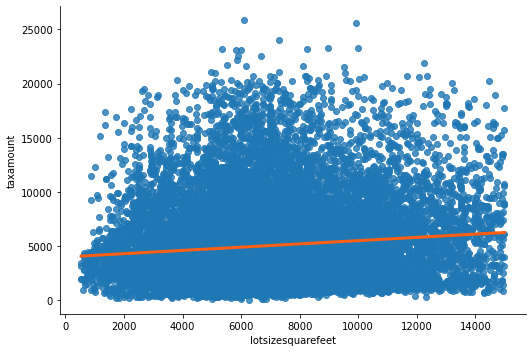

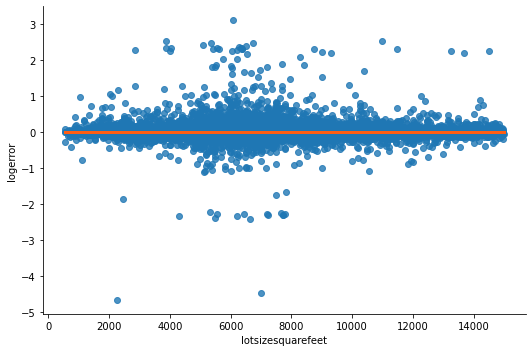

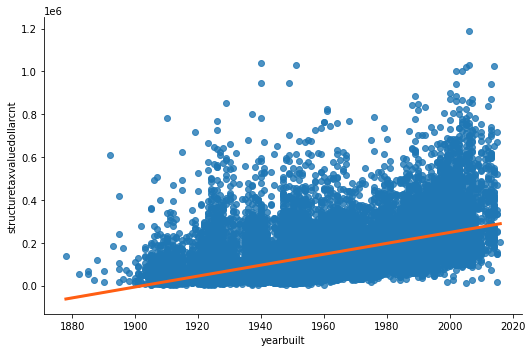

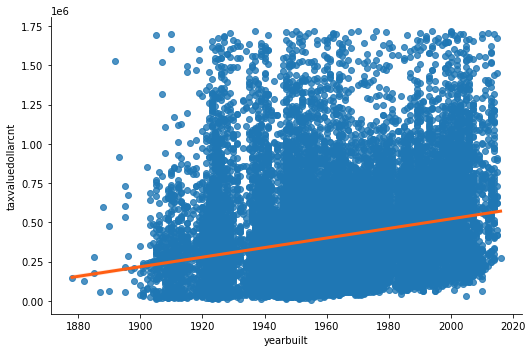

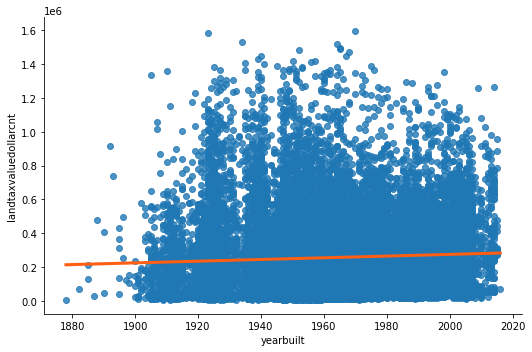

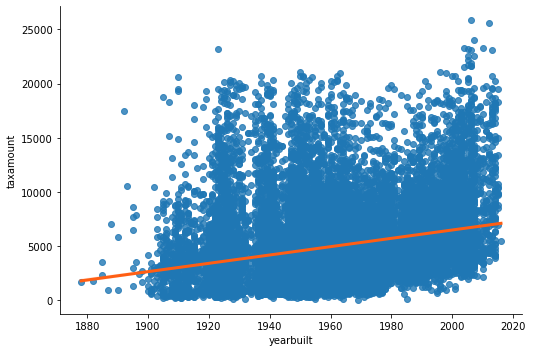

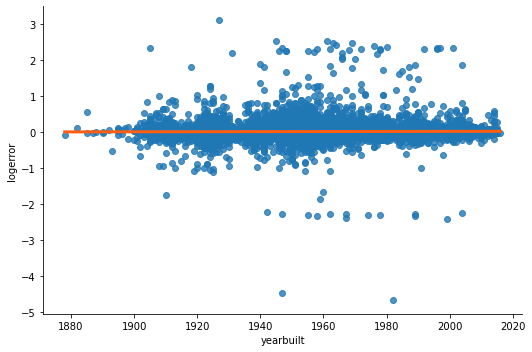

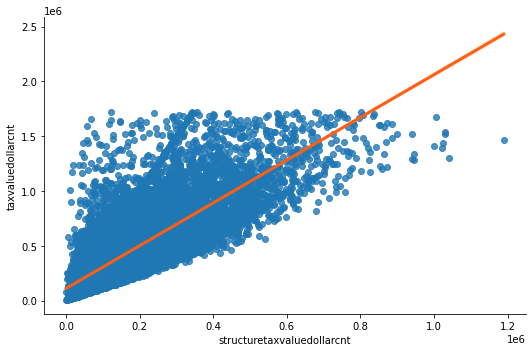

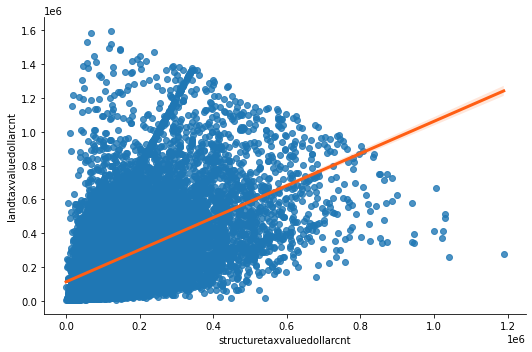

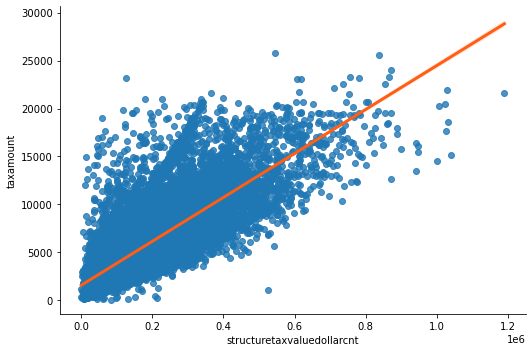

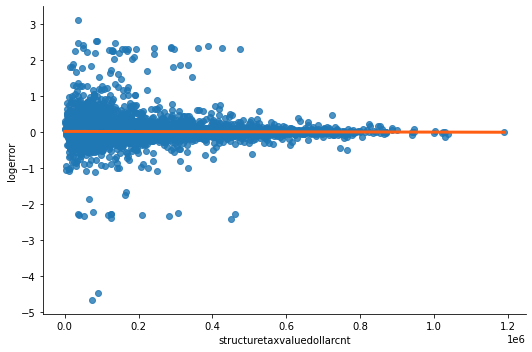

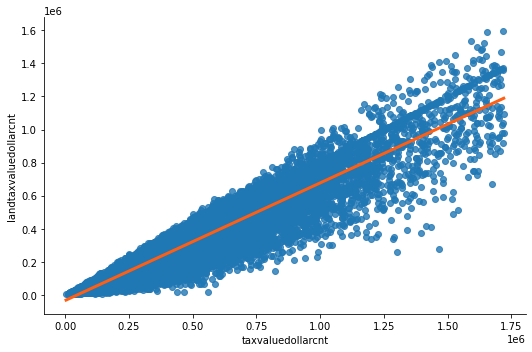

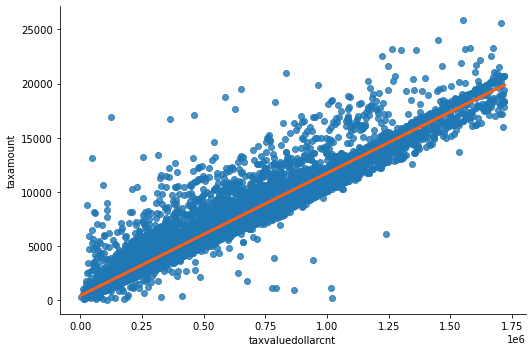

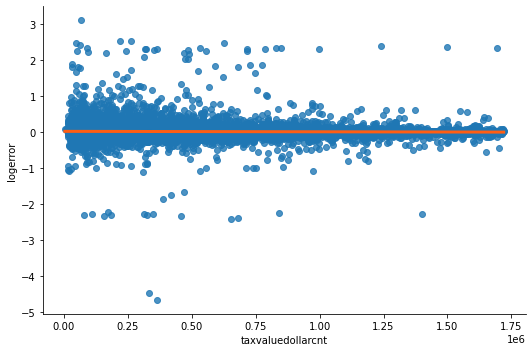

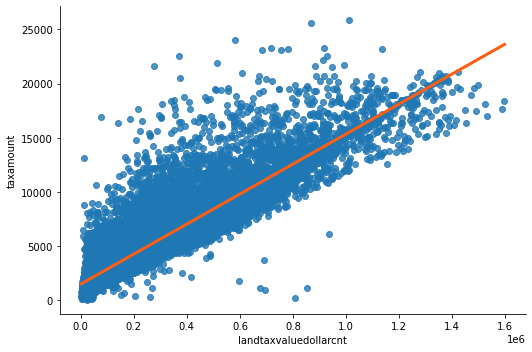

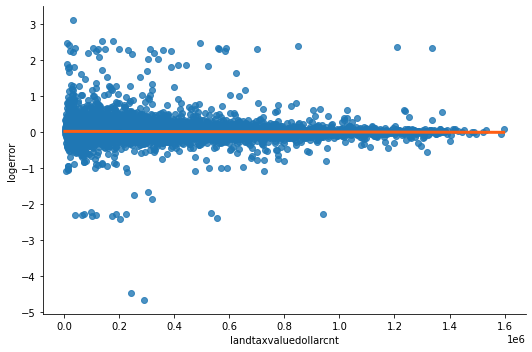

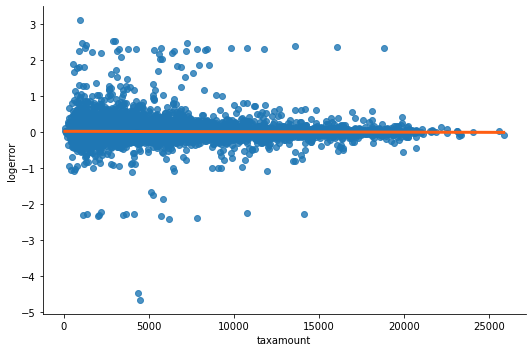

In [21]:
# Just going to plot actual continuous variables not numerical/discrete data
plot_variable_pairs(train, to_drop = ['bathroomcnt','bedroomcnt','calculatedbathnbr','fullbathcnt','latitude','longitude',
                                     'regionidzip','roomcnt', 'rawcensustractandblock'])

In [ ]:
 # Writing a function that plots continuous variables with categoricals separated out to visualize all the potential relationships.

def plot_categorical_and_continuous_vars(df, continuous, categorical):
    '''
    This function takes in a dataframe, a list of continuous variables, and a list of categorical variables and does 
    3 plots for each unique combination of categorical and continuous variable.
    
    Arguments: df - a dataframe consisting of continuous and categorical columns
    '''
    plot_list = []
    for cat in categorical:
        for cont in continuous:
            plot_list.append([cat, cont])
    
    for i in plot_list:
        plt.figure(figsize=(18, 5))
        plt.subplot(131)
        sns.boxplot(x=i[0], y=i[1], data=df)
        plt.subplot(132)
        sns.stripplot(x=i[0], y=i[1], data=df)
        plt.subplot(133)
        sns.violinplot(x=i[0], y=i[1], data=df)
#         sns.barplot(x=i[0], y=i[1], data=df)
        plt.show()